# Utilizing Machine Learning to Predict Heart Disease
**In this project, we'll delve into employing machine learning algorithms to forecast whether a patient has heart disease based on their medical attributes. We'll adhere to a structured methodology, commencing with comprehending the problem and concluding with the evaluation of our models**

This notebook will explore the challenge of `Classification` heart illness in order to explain some basic principles of data science and machine learning.

It is meant to serve as a comprehensive illustration of what a machine learning and data science proof of concept could entail.


1. **Exploratory Data Analysis (EDA)**: EDA involves thoroughly examining a dataset to gain insights and understand its characteristics. It includes tasks like visualizing data distributions, identifying patterns, and detecting outliers.

2. **Model Training**: In this step, we create one or more models that learn from the dataset to predict a target variable based on other input features. The goal is to find the best model that generalizes well to unseen data.

3. **Model Evaluation**: After training, we assess how well our model performs using specific evaluation metrics. These metrics depend on the problem we're solving (e.g., accuracy, precision, recall, F1-score).

4. **Model Comparison**: We compare different models to determine which one performs best. This helps us choose the most suitable model for our task.

5. **Model Fine-Tuning**: Once we identify a promising model, we fine-tune it by adjusting hyperparameters, optimizing feature selection, or addressing overfitting.

6. **Feature Importance**: When predicting heart disease (or any other outcome), we explore which features (variables) contribute most significantly to the model's predictions. Understanding feature importance helps interpret the model.

7. **Cross-Validation**: To ensure our model's robustness, we use cross-validation. It assesses how well the model generalizes by splitting the data into training and validation subsets multiple times.

8. **Reporting Findings**: If we were presenting our work, we'd summarize our findings, discuss model performance, highlight important features, and provide actionable insights.

Let’s embark on this data science journey step by step. By the end of our notebook, we’ll have developed several models capable of predicting whether an individual has heart disease. These models will rely on various parameters, achieving a commendable level of accuracy. 🌟📊

## 1. Problem

We are dealing with a binary classification task. Each sample (patient) can fall into one of two categories: either they have heart disease or they don’t.

**Features**: We’ll utilize various clinical parameters (features) about a patient. These features could include information such as age, blood pressure, cholesterol levels, and more.

**Objective**: Our goal is to build a predictive model that, given these clinical parameters, can accurately predict whether an individual has heart disease or not.

In summary, we want to answer the question: Can we predict the presence of heart disease based on patient data? 🫀🔍

## 2. Data Exploration

To address our problem definition, we need to explore the data on which our predictions are based. Here are the key steps:

1. **Data Source**: The original data originates from the [Cleveland database](https://archive.ics.uci.edu/ml/datasets/heart+Disease) in the **UCI Machine Learning Repository**. This database contains information related to heart disease and has been widely used by machine learning researchers.

2. **Data Format**: We've obtained a formatted version of this dataset from [Kaggle](https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset). The original database included **76 attributes**, but for our analysis, we'll focus on a **subset of 14 attributes**. These attributes serve as the **independent variables** (features) that we'll use to predict our target variable.

3. **Target Variable**: Our **dependent variable** is whether or not a patient has heart disease. The "goal" field in the dataset indicates the presence of heart disease, with integer values ranging from 0 (no presence) to 4 (various levels of presence).

4. **Data Preparation**: The original data underwent preprocessing, including the removal of patient names and social security numbers.

In summary, we aim to predict the presence of heart disease based on various medical attributes (independent variables) associated with each patient.

**Read this publication** form [ScienceDirect](https://www.sciencedirect.com/science/article/abs/pii/0002914989905249)

Let's proceed with our analysis! 🫀🔍


## 3. Evaluation

Defining an evaluation metric at the outset of a project is crucial. For instance, we might set the following goal:

* **Goal**: If we can achieve **95% accuracy** in predicting whether a patient has heart disease during the proof of concept, we'll pursue this project.

This initial target provides a clear objective for machine learning engineers and data scientists to strive toward. However, keep in mind that due to the experimental nature of machine learning, the evaluation metric may evolve over time.

Let's proceed with our analysis! 📊🎯🫀


## 4. Features

During this step, we explore the different components of our dataset. One effective approach is to create a **data dictionary**.

## Heart Disease Data Dictionary

A data dictionary provides detailed descriptions of the data you're working with. While not all datasets come with predefined dictionaries, it's essential to understand the features. If necessary, consult subject matter experts or conduct research to gather additional insights.

Below are the features we'll utilize to predict our target variable (presence or absence of heart disease):

1. **Age**: The patient's age in years.
2. **Sex**: The patient's sex (1 = male, 0 = female).
3. **Chest Pain Type (cp)**:
    - 0: Typical angina
    - 1: Atypical angina
    - 2: Non-anginal pain
    - 3: Asymptomatic
4. **Resting Blood Pressure (trestbps)**: Resting blood pressure (in mm Hg).
5. **Cholesterol (chol)**: Serum cholesterol level (in mg/dL).
6. **Fasting Blood Sugar (fbs)**:
    - 1: Fasting blood sugar > 120 mg/dL
    - 0: Fasting blood sugar ≤ 120 mg/dL
7. **Resting Electrocardiographic Results (restecg)**:
    - 0: Normal
    - 1: ST-T wave abnormality
    - 2: Left ventricular hypertrophy
8. **Maximum Heart Rate Achieved (thalach)**: Maximum heart rate achieved during exercise.
9. **Exercise-Induced Angina (exang)**:
    - 1: Yes
    - 0: No
10. **ST Depression Induced by Exercise Relative to Rest (oldpeak)**: ST depression induced by exercise relative to rest.
11. **Slope of the Peak Exercise ST Segment (slope)**:
    - 0: Upsloping
    - 1: Flat
    - 2: Downsloping
12. **Number of Major Vessels Colored by Fluoroscopy (ca)**: Number of major vessels (0-3) colored by fluoroscopy.
13. **Thalassemia (thal)**:
    - 3: Normal
    - 6: Fixed defect
    - 7: Reversible defect
14. **target** - have disease or not (1=yes, 0=no) (= the predicted attribute)

These features will play a crucial role in predicting whether a patient has heart disease or not.

### Preparing the tools
At the start of any project, it's custom to see the required libraries imported in a big chunk like you can see below.

However, in practice, your projects may import libraries as you go. After you've spent a couple of hours working on your problem, you'll probably want to do some tidying up. This is where you may want to consolidate every library you've used at the top of your notebook (like the cell below).

The libraries you use will differ from project to project. But there are a few which will you'll likely take advantage of during almost every structured data project.

In [1]:
# Import necessary libraries for exploratory data analysis (EDA) and plotting
import numpy as np  # Shortened to np
import pandas as pd  # Shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns  # Shortened to sns

# Ensure plots appear in the notebook
%matplotlib inline

## Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluation tools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
# Note: In Scikit-Learn 1.2+, "plot_roc_curve" was changed to "RocCurveDisplay"
from sklearn.metrics import RocCurveDisplay

# Print last updated timestamp
import time
print(f"Last updated: {time.asctime()}")

Last updated: Sun Jan 11 19:09:25 2026


### Data Loading

Numerous methods exist for loading data. A common method for tabular data, akin to Excel files, is using the `.csv` (comma-separated values) format.

Pandas includes a convenient built-in function called `read_csv()`, specifically tailored for reading `.csv` files. This function requires the file pathname of your `.csv` file as input and is widely used for data loading tasks.


#### Exploratory Data Analysis (EDA) Checklist
Since EDA lacks a predefined methodology, the following checklist can guide you:

1. **Define Questions**: Identify the questions you aim to answer or hypotheses you wish to test.
2. **Understand Data Types**: Analyze the types of data you possess and how to handle different data types effectively.
3. **Handle Missing Data**: Determine missing values within the dataset and implement strategies to address them.
4. **Detect Outliers**: Identify outliers in the data and assess their significance.
5. **Feature Engineering**: Explore opportunities to enhance the dataset by adding, modifying, or removing features.

A quick and easy method to examine your data is using the `head()` function. Invoking it on any dataframe displays the top 5 rows, while `tail()` shows the bottom 5. You can specify the number of rows to display, such as `head(10)`, to view the top 10 rows.



In [2]:
df = pd.read_csv("data/heart-disease-UCI.csv")
# df.shape
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#### Count of Positive and Negative Samples

To determine the distribution of positive (1) and negative (0) samples in our dataframe, we can use the `value_counts()` function on the 'target' column of the DataFrame `df`.

In [3]:
# Let's see how many positive (1) and negative (0) samples we have in our dataframe
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

Since the counts of positive and negative samples are close to even, our target column can be considered balanced. An unbalanced target column, where some classes have significantly more samples, can be more challenging to model than a balanced set. Ideally, all target classes should have an equal number of samples.

If you prefer to view these values as percentages, you can achieve this by setting the `normalize` parameter of the `value_counts()` function to true.


In [4]:
# Normalized value counts
df.target.value_counts(normalize=True)

target
1    0.544554
0    0.455446
Name: proportion, dtype: float64

We can visualize the distribution of the target column values by utilizing the `plot()` function and specifying the desired plot type. In this case, a bar plot would be suitable.

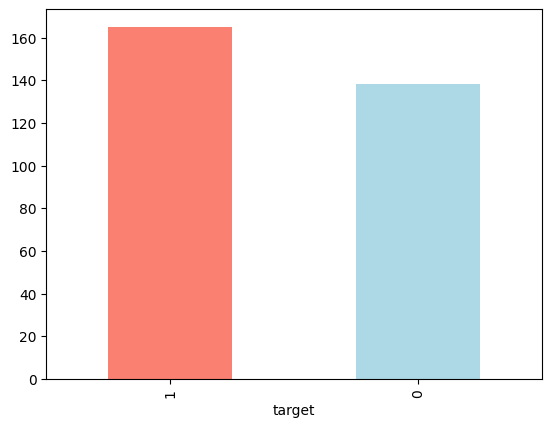

In [5]:
# Plot the value counts with a bar graph
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

The `df.info()` method provides a concise overview of the dataset, including the number of missing values and the data types of each column.

In our scenario, there are no missing values, and all columns contain numerical data.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Another method to obtain quick insights into your dataframe is by using `df.describe()`. This method presents various statistics about numerical columns, including metrics such as mean, maximum, and standard deviation.


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Gender

To compare two columns, you can utilize the function `pd.crosstab(column_1, column_2)`. This is particularly useful for gaining an understanding of how independent variables interact with dependent variables.

Let's compare our target column with the sex column.

As per our data dictionary:
- For the target column, 1 signifies heart disease present, and 0 signifies no heart disease.
- For the sex column, 1 represents male, and 0 represents female.

In [8]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [9]:
#Comparison of Target Column with Sex Column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


Based on the comparison between the target column and the sex column:

- For females (sex = 0), out of approximately 100 individuals, around 72 have a positive value indicating heart disease presence. Therefore, based solely on gender, there's a 75% chance of heart disease.

- For males (sex = 1), out of approximately 200 individuals, roughly half indicate the presence of heart disease. Thus, based solely on gender, there's a 50% chance of heart disease.

By averaging these two values, we can establish a simple heuristic: if we know nothing else about a person, there's a 62.5% chance they have heart disease.

This basic heuristic can serve as our initial baseline, which we aim to surpass using machine learning techniques.


### Visualizing Crosstab

To visualize the crosstab, you can utilize the `plot()` function with parameters such as:
- `kind`: the type of plot (e.g., bar graph)
- `figsize`: the dimensions of the plot
- `color`: the colors to be used in the plot

Different metrics are best represented with different types of plots. In this case, a bar graph is suitable. With practice, you'll develop an intuition for selecting the appropriate plot for different variables.


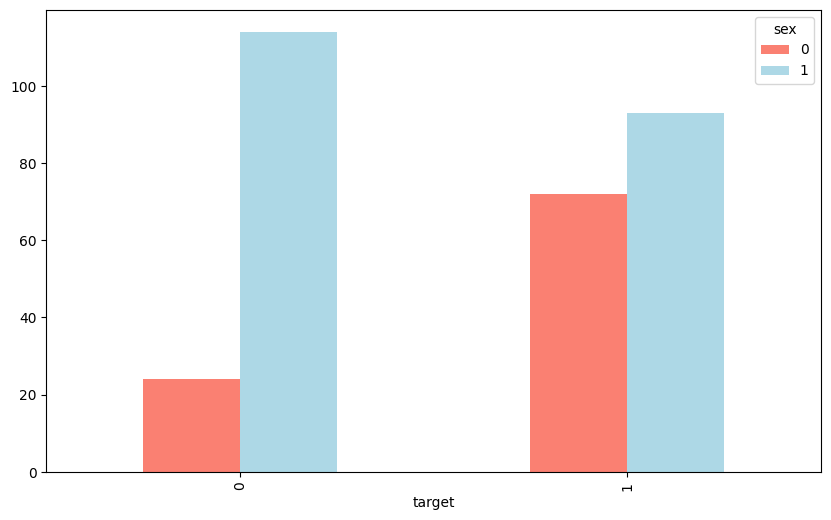

In [10]:
# Create a plot
pd.crosstab(df.target, df.sex).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["salmon", "lightblue"]);

The plot appears quite basic at the moment. Let's enhance it by adding some attributes.

We'll generate the plot again using `crosstab()` and `plot()`, then include informative labels using functions like `plt.title()`, `plt.xlabel()`, and others.

Remember to apply these attributes to `plt` within the same cell where you create the graph.


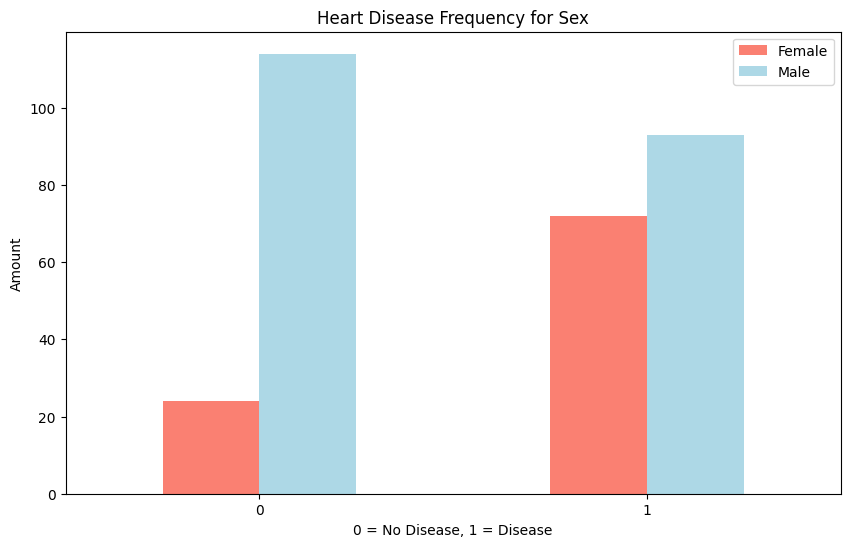

In [11]:
# Create a plot
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])

# Add some attributes to it
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); # keep the labels on the x-axis vertical

### Age vs. Max Heart Rate for Heart Disease

To explore the relationship between age and maximum heart rate (thalach) concerning heart disease, we'll create a scatter plot. This plot will allow us to visualize the distribution of data points and identify potential patterns or trends.


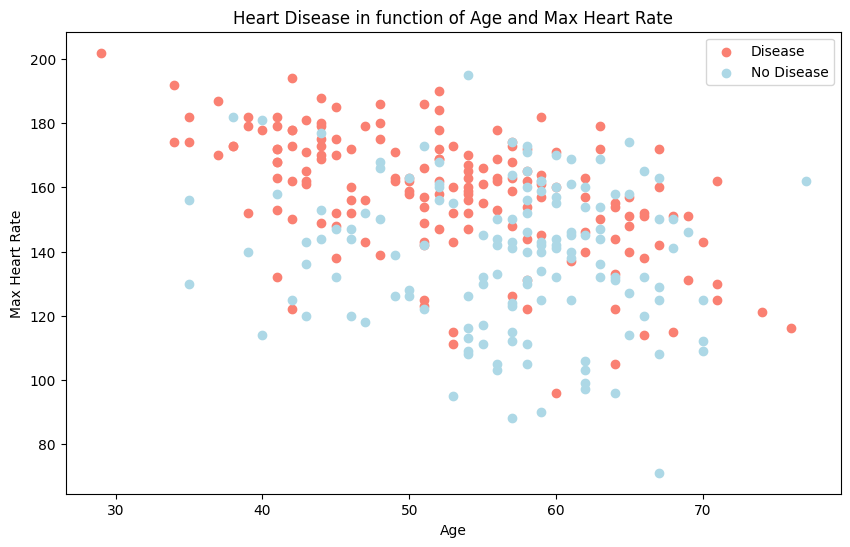

In [12]:
# Create another figure
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1], 
            c="salmon") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0], 
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

### Inference from Age vs. Max Heart Rate for Heart Disease

Observationally, it appears that younger individuals tend to have higher maximum heart rates, as indicated by the dots being higher on the left side of the graph. Conversely, there is a prevalence of green dots (indicating heart disease presence) among older participants, potentially influenced by the larger concentration of dots on the right side of the graph (representing older individuals).

These observations provide initial insights into the data, contributing to our understanding of its characteristics.

### Age Distribution

Histograms offer a useful method for assessing the distribution of a variable.

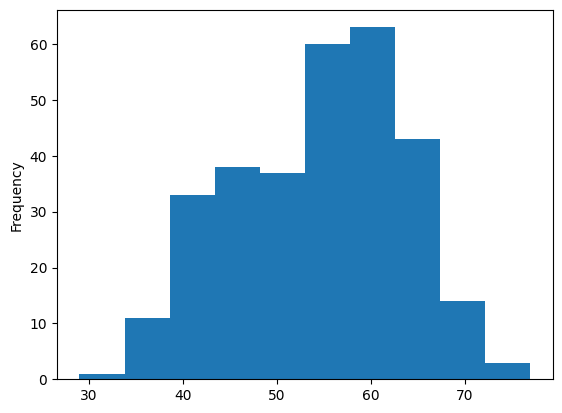

In [13]:
# Histograms are a great way to check the distribution of a variable
df.age.plot.hist();

### Inference from Age Distribution

The age distribution appears to follow a slightly right-skewed normal distribution, as evidenced by the histogram. This characteristic is reflected in the scatter plot, contributing to the observed patterns.

### Heart Disease Frequency per Chest Pain Type

We'll proceed by examining another independent variable, namely cp (chest pain), using a similar approach to our analysis with sex.


In [14]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


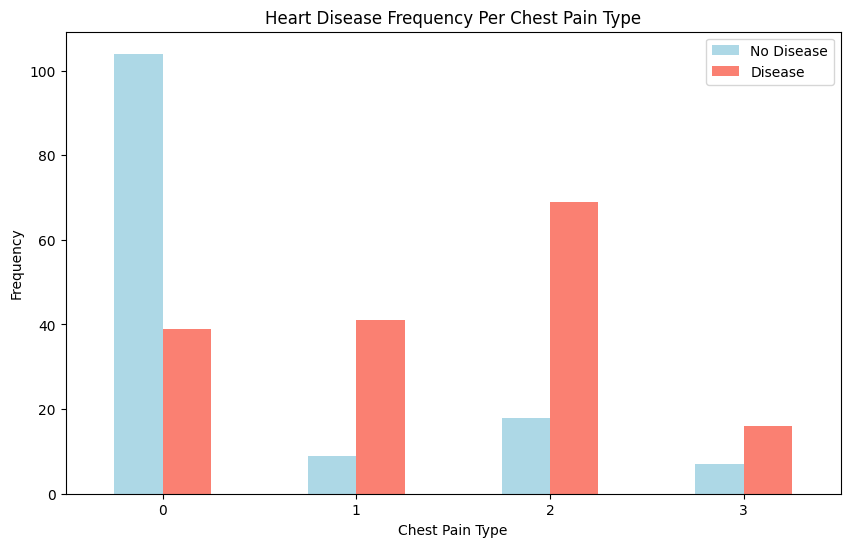

In [15]:
# Create a new crosstab and base plot
pd.crosstab(df.cp, df.target).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["lightblue", "salmon"])

# Add attributes to the plot to make it more readable
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

### Correlation between Independent Variables

To gain insights into the relationships between all independent variables and our target variable, we'll compare them using a correlation matrix.

The correlation matrix, generated by `df.corr()`, provides a table of numerical values indicating the degree of association between each pair of variables. This analysis can help identify which independent variables may potentially influence our target variable.


In [16]:
# Find the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


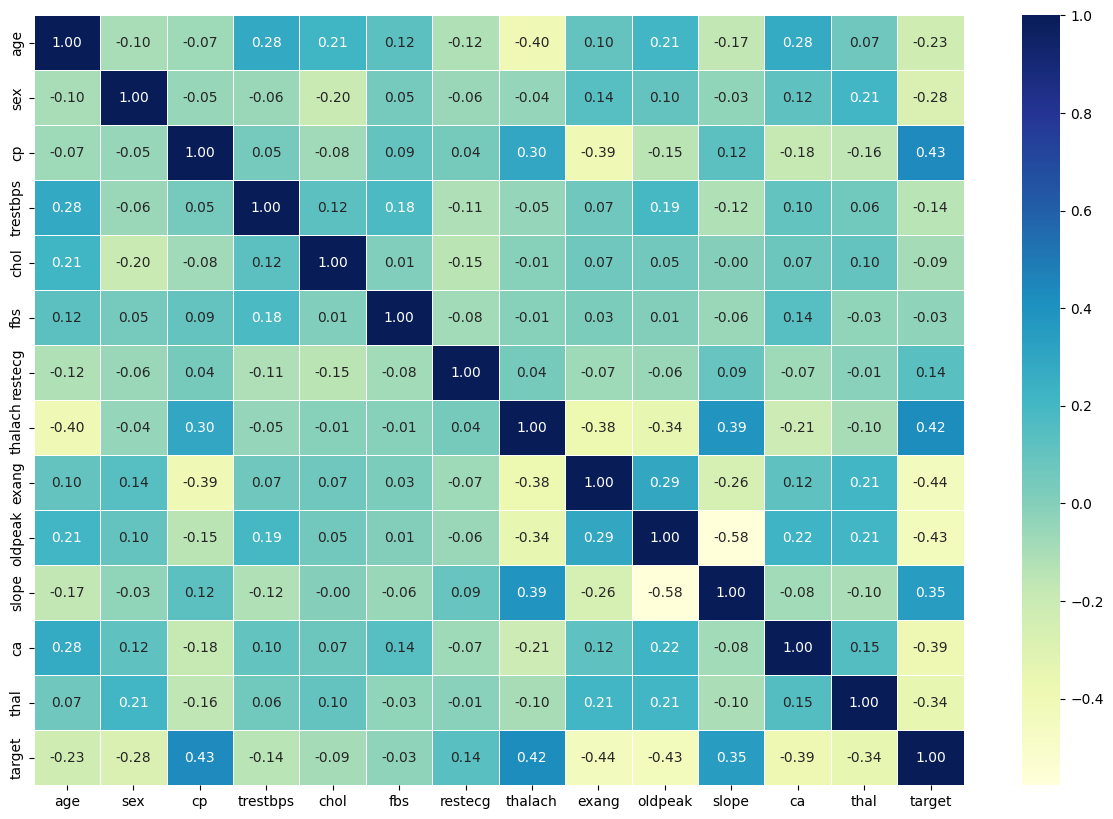

In [17]:
# Let's make it look a little prettier
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

### Transition to Modeling

Having conducted exploratory data analysis (EDA), we've begun to develop an understanding of our dataset.

Key Takeaways:
- Besides our baseline estimate using sex, the remaining data appears to be fairly distributed.
- Next, we'll transition to model-driven EDA, utilizing machine learning models to guide our further inquiries.

Additional Considerations:
- EDA approaches can vary widely, and what we've seen here is an example tailored for structured, tabular datasets.
- There are numerous visualization techniques beyond those demonstrated here, so exploring more options is encouraged.

We aim to swiftly identify:
- Distributions (`df.column.hist()`)
- Missing values (`df.info()`)
- Outliers

Let's proceed with building some models.


## 5. Modeling

- Having explored the data, we'll now utilize machine learning to predict our target variable based on the 13 independent variables.

**Recall our problem statement:**

Given clinical parameters about a patient, can we predict whether or not they have heart disease?

**Our evaluation metric:**

If we achieve 95% accuracy in predicting whether or not a patient has heart disease during the proof of concept, we'll pursue this project.

Before constructing a model, we need to prepare our dataset. Let's revisit it.


In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


We aim to predict our target variable using all other variables.

To accomplish this, we need to separate the target variable from the rest of the dataset.

In [19]:
# Everything except target variable
X = df.drop("target", axis=1)

# Target variable
y = df.target.values

Let's examine our new variables. 🧐

In [20]:
# Independent variables (no target column)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [21]:
# Targets
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Training and Test Split

One of the fundamental concepts in machine learning is the training/test split.

This involves dividing your data into a training set and a test set. The training set is used to train your model, while the test set is used to evaluate its performance.

**Why not use all the data for training?**

Imagine taking your model into a hospital and using it on new patients not included in the original dataset. How would you know how well your model performs on unseen data?

This is where the test set comes in. It simulates deploying your model in a real-world scenario as closely as possible.

It's crucial to never let your model learn from the test set; it should only be evaluated on it.

To split our data into training and test sets, we can utilize Scikit-Learn's `train_test_split()` function, passing it our independent and dependent variables (X & y).

In [22]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

The `test_size` parameter in the `train_test_split()` function determines the proportion of our data allocated to the test set.

A common practice is to allocate 80% of the data for training and the remaining 20% for testing.

While for our current problem, a train and test set suffice, other problems may require additional data splits such as a validation (train/validation/test) set or cross-validation.

Each problem may necessitate different approaches. Rachel Thomas' post, "How (and why) to create a good validation set," provides valuable insights into this topic.

Let's examine our training data.


In [23]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [24]:
y_train, len(y_train)

(array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
        1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
        1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1],
       dtype=int64),
 242)

Super! We can observe that we have 242 samples allocated for training. Now, let's take a look at our test data.


In [25]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [26]:
y_test, len(y_test)

(array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64),
 61)

Great! We have 61 examples reserved for testing our model(s). Now, let's proceed to build some. 🚀


### Model Choices

With our data prepared, we're ready to fit models. We'll be using the following algorithms and comparing their results:

- Logistic Regression: `LogisticRegression()`
- K-Nearest Neighbors: `KNeighborsClassifier()`
- Random Forest: `RandomForestClassifier()`

Why these models?

Referring to the Scikit-Learn algorithm cheat sheet, since we're dealing with a classification problem, these algorithms are among the suggested choices (along with a few others).

![image](https://scikit-learn.org/stable/_static/ml_map.png)



"Wait, I don't see Logistic Regression listed 🤔, and why not use LinearSVC?"

These are excellent questions. 🙌

The absence of Logistic Regression from the Scikit-Learn algorithm cheat sheet can be puzzling, especially since it's a commonly used model for classification tasks. 📊 As for LinearSVC, let's imagine we've experimented with it and found that it doesn't yield satisfactory results, so we're exploring other options recommended in the map. 🗺️

In the realm of machine learning and data science, it's crucial to understand that it's an iterative practice. Algorithms are simply tools in your toolbox. 🧰 What's more important initially is comprehending the nature of your problem (e.g., classification versus regression) and being aware of the available tools to address it. 📈

Given our relatively small dataset, we have the flexibility to experiment with various algorithms to determine which one performs best. 🚀

The Scikit-Learn library offers a consistent interface across all algorithms. Both training a model (`model.fit(X_train, y_train)`) and evaluating it (`model.score(X_test, y_test)`) follow the same conventions. The `score()` method returns the ratio of correct predictions (1.0 indicating 100% accuracy). 🎯

Since the selected algorithms share the same methods for fitting and scoring, let's organize them into a dictionary and create a process that fits and scores them. 📝


In [27]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [28]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

C:\Users\keert\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

### Model Comparison

Now that we've stored our models' scores in a dictionary, we can visualize them by first converting them into a DataFrame. 📊

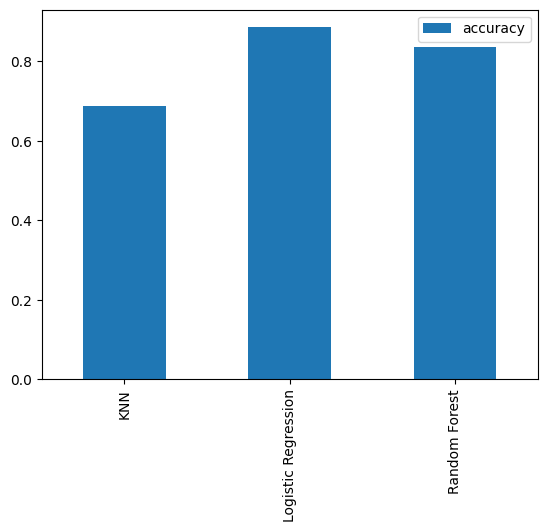

In [29]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

<Axes: >

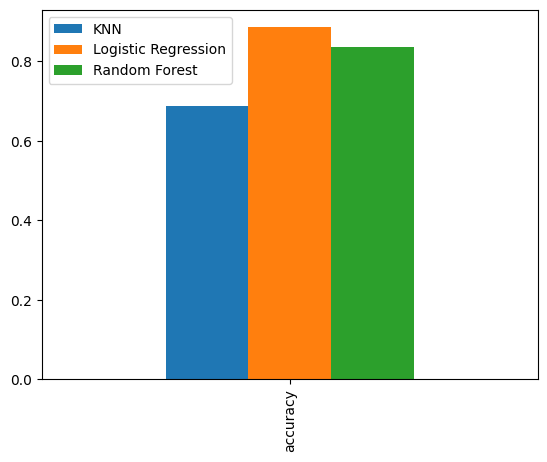

In [30]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.plot.bar()

### Understanding Key Metrics in Machine Learning

Before diving into the technical details, let's briefly review some important concepts:

**Hyperparameter Tuning:** Think of it as adjusting the knobs on a machine learning model to optimize its performance. Changing these settings can significantly impact the model's effectiveness.

**Feature Importance:** Not all features (or variables) are created equal. Some may have a more significant impact on predictions than others. Identifying these influential features can provide valuable insights into the underlying patterns in the data.

**Confusion Matrix:** This is a handy tool that compares the predicted values of a model with the actual values in a tabular format. It gives a clear picture of the model's performance, highlighting correct and incorrect predictions.

**Cross-Validation:** Instead of relying on a single split of the data into training and testing sets, cross-validation involves splitting the data into multiple subsets and evaluating the model's performance on each. This approach provides a more robust assessment of the model's generalization ability.

**Precision:** It measures the proportion of true positive predictions over the total number of samples predicted as positive. A higher precision indicates fewer false positives.

**Recall:** This metric calculates the proportion of true positive predictions over the total number of true positives and false negatives. Higher recall suggests fewer false negatives.

**F1 Score:** Combining precision and recall into a single metric, the F1 score provides a balanced assessment of the model's performance, where 1 indicates the best performance and 0 the worst.

**Classification Report:** Sklearn's `classification_report()` function provides a comprehensive summary of classification metrics, including precision, recall, and F1-score for each class in the dataset.

**ROC Curve:** The Receiver Operating Characteristic curve is a graphical representation of the true positive rate versus the false positive rate. It helps assess the trade-off between sensitivity and specificity.

**Area Under Curve (AUC):** The AUC quantifies the overall performance of a model by measuring the area under the ROC curve. A perfect model achieves an AUC score of 1.0.

Now, armed with a better understanding of these concepts, let's proceed with the analysis. 📊🤓


### Hyperparameter Optimization and Cross-Validation

Just like cooking your favorite dish requires adjusting oven settings, machine learning algorithms also benefit from tweaking parameters. However, excessive adjustments can lead to overfitting, akin to burning your food. 

We're seeking the "Goldilocks" model: one that performs well on our data and generalizes to new examples. 

With our limited data, we'll use cross-validation rather than a separate validation set to experiment with hyperparameters. 

The most common approach is k-fold cross-validation, where the data is split into k subsets for testing. For instance, with 5 folds (k = 5), each fold represents a segment of the data used for testing in rotation. 🔄
![image](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)


We'll be using this setup to tune the hyperparameters of some of our models and then evaluate them. We'll also get a few more metrics like precision, recall, F1-score, and ROC at the same time. 📊📈

Here's the game plan:

1. Tune model hyperparameters, see which performs best
2. Perform cross-validation
3. Plot ROC curves
4. Make a confusion matrix
5. Get precision, recall, and F1-score metrics
6. Find the most important model features

We'll start by tuning the hyperparameters of the K-Nearest Neighbors (KNN) algorithm.

For KNN, the main hyperparameter we can tune is the number of neighbors. The default is 5 (n_neighbors=5).

What are neighbors?

Imagine all our different samples on one graph like the scatter graph we have above. KNN works by assuming dots which are closer together belong to the same class. If n_neighbors=5, then it assumes a dot with the 5 closest dots around it are in the same class. 🤝

We've left out some details here like what defines close or how distance is calculated, but I encourage you to research them.

For now, let's try a few different values of n_neighbors. 🧮

In [31]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))

Let's examine the training scores of the K-Nearest Neighbors (KNN) model.


In [32]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

Maximum KNN score on the test data: 75.41%


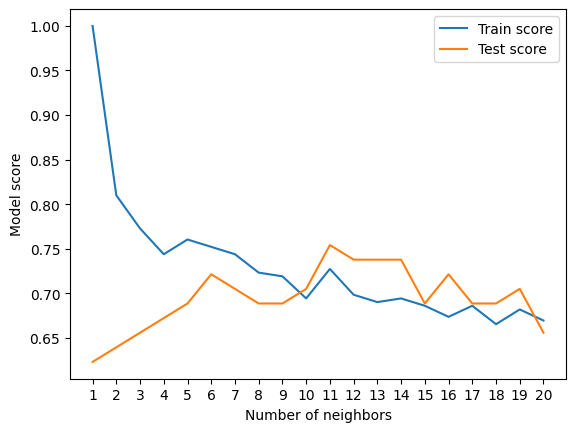

In [33]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

Looking at the graph, it appears that n_neighbors = 11 yields the best performance.

However, even with this knowledge, the performance of the K-Nearest Neighbors (KNN) model didn't come close to that of Logistic Regression or the RandomForestClassifier.

Considering this, we'll discard KNN and focus on the other two models.

Instead of manually tuning Logistic Regression and RandomForestClassifier, let's use RandomizedSearchCV.

RandomizedSearchCV automatically tries a number of different hyperparameter combinations, evaluates them, and selects the best one.

To do this, we'll create a hyperparameter grid (a dictionary of different hyperparameters) for each model and then test them out.

In [34]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now, let's utilize RandomizedSearchCV to tune our LogisticRegression model.

We'll provide it with the different hyperparameters from the `log_reg_grid` dictionary and set `n_iter = 20`. This means RandomizedSearchCV will explore 20 different combinations of hyperparameters from `log_reg_grid` and select the best ones.


In [35]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [36]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [37]:
rs_log_reg.score(X_test, y_test)


0.8852459016393442

Now that we've tuned LogisticRegression using RandomizedSearchCV, let's do the same for RandomForestClassifier.


In [38]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [39]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [40]:
# Evaluate the randomized search random forest model
rs_rf.score(X_test, y_test)

0.8688524590163934

Excellent! Tuning the hyperparameters for each model resulted in a slight performance boost for both the RandomForestClassifier and LogisticRegression.

This is analogous to adjusting the settings on your oven to perfectly cook your favorite dish.

However, since LogisticRegression is showing promising results, let's further fine-tune it using GridSearchCV.

GridSearchCV differs from RandomizedSearchCV in that it exhaustively tests every possible combination of hyperparameters, rather than a specified number of iterations.

In summary:
- RandomizedSearchCV tries a limited number of combinations and selects the best one.
- GridSearchCV tests every single combination and selects the best.

Let's see GridSearchCV in action.


In [41]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [42]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [43]:
# Evaluate the model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In this case, we obtain the same results as before since our grid only contains a maximum of 20 different hyperparameter combinations.

Note: If your grid contains a large number of hyperparameter combinations, GridSearchCV may take a significant amount of time to evaluate all of them. This is why it's often recommended to start with RandomizedSearchCV to explore a subset of combinations before refining the search with GridSearchCV.

Now that we have a tuned model, let's evaluate its performance using various metrics beyond accuracy.

We'll examine:

- ROC curve and AUC score using `RocCurveDisplay`
- Confusion matrix using `confusion_matrix`
- Classification report using `classification_report`
- Precision using `precision_score`
- Recall using `recall_score`
- F1-score using `f1_score`

Fortunately, Scikit-Learn provides built-in functions for all of these metrics.

To calculate these metrics, we'll need to make predictions on the test set using our trained model. We can do this by calling the `predict()` method on the model and passing it the test data.

Let's proceed by making predictions on the test data.


In [44]:
# Make preidctions on test data
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [45]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

Now that we have our predicted values, we can calculate the metrics we're interested in.

Let's start by visualizing the ROC curve and calculating the AUC scores.

What's a ROC curve?

It's a graphical representation of the trade-off between the true positive rate (sensitivity) and the false positive rate (1 - specificity) for a binary classification model across different threshold values.

In simpler terms, it helps us understand how well our model is distinguishing between the positive and negative classes.

Scikit-Learn provides a function called `RocCurveDisplay` (previously known as `plot_roc_curve` in Scikit-Learn versions > 1.2) for creating ROC curves and calculating the area under the curve (AUC) metric.

According to the documentation, we can use the `from_estimator(estimator, X, y)` class method of `RocCurveDisplay`, where `estimator` is a fitted machine learning model, and `X` and `y` are the data used for testing.

In our case, we'll use the GridSearchCV version of our LogisticRegression estimator, `gs_log_reg`, along with the test data, `X_test` and `y_test`.


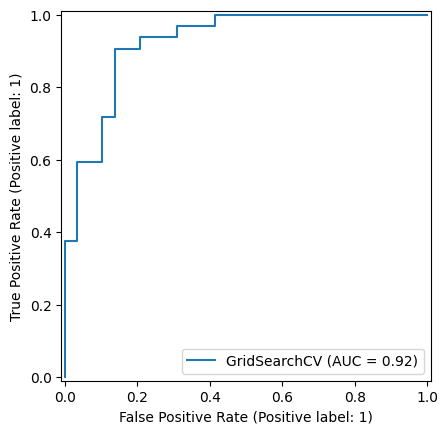

In [46]:
# Before Scikit-Learn 1.2.0 (will error with versions 1.2+)
# from sklearn.metrics import plot_roc_curve 
# plot_roc_curve(gs_log_reg, X_test, y_test);

# Scikit-Learn 1.2.0 or later
from sklearn.metrics import RocCurveDisplay 

# from_estimator() = use a model to plot ROC curve on data
RocCurveDisplay.from_estimator(estimator=gs_log_reg, 
                               X=X_test, 
                               y=y_test); 

This is fantastic! Our model performs significantly better than random guessing, which would correspond to a line going from the bottom left corner to the top right corner (AUC = 0.5). However, a perfect model would achieve an AUC score of 1.0, indicating flawless performance. Therefore, there is still room for improvement.

Next, let's examine a confusion matrix.

A **confusion matrix** is a visual representation that displays where your model made correct predictions and where it made incorrect predictions, allowing you to identify areas of confusion.

Scikit-Learn provides a convenient way to create a confusion matrix using the `confusion_matrix()` function. You simply need to pass it the true labels and the predicted labels.


In [47]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


As you can see, Scikit-Learn's built-in confusion matrix is a bit basic. For a presentation or visualization purposes, it's often helpful to create a more visually appealing representation.

We can achieve this by creating a function that utilizes Seaborn's `heatmap()` function.


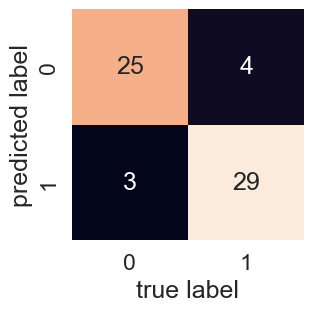

In [48]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

Beautiful! That looks much better.

From the heatmap, we can observe that the model makes similar numbers of errors (false positives and false negatives) across both classes. Specifically, there are 4 instances where the model predicted 0 when it should have been 1 (false negatives), and 3 instances where the model predicted 1 instead of 0 (false positives).

## Classification Report
We can generate a classification report using the `classification_report()` function, which takes the true labels and the predicted labels as input. This report provides information on the precision, recall, and F1-score of our model for each class.


In [49]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



What's going on here?

Let's refresh our memory:

- **Precision**: Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model with no false positives has a precision of 1.0.
- **Recall**: Indicates the proportion of actual positives which were correctly classified. A model with no false negatives has a recall of 1.0.
- **F1 score**: A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
- **Support**: The number of samples each metric was calculated on.
- **Accuracy**: The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
- **Macro avg**: Short for macro average, it's the average precision, recall, and F1 score between classes. It doesn't consider class imbalance, so it's important to pay attention to this metric if there are class imbalances.
- **Weighted avg**: Short for weighted average, it's the weighted average precision, recall, and F1 score between classes. Each metric is calculated based on the number of samples in each class. This metric favors the majority class and gives a high value when one class outperforms another due to having more samples.

Now that we have a better understanding, let's calculate these metrics using cross-validation to make them more robust. We'll use the best model along with the best hyperparameters and evaluate them using cross_val_score().


In [50]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [51]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

Now that we have our classifier instantiated, let's compute some cross-validated metrics.


In [52]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

Since we have 5 metrics here, we'll take the average.


In [53]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

Now we'll do the same for other classification metrics.


In [54]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.8215873015873015

In [55]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.9272727272727274

In [56]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.8705403543192143

Okay, we've got cross-validated metrics, now what?

Let's visualize them.


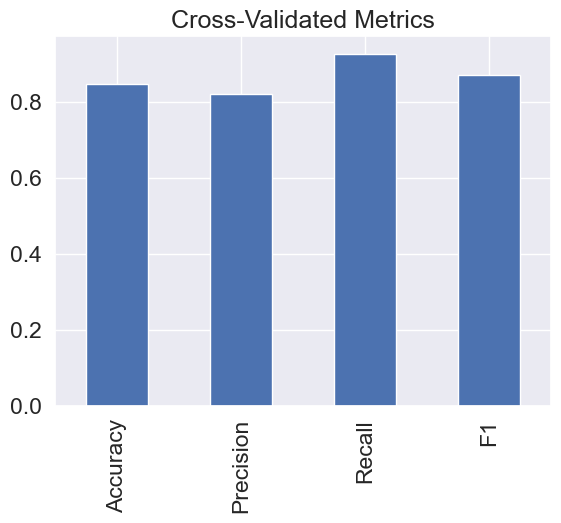

In [57]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

Great! This looks like something we could share. An extension might be adding the metrics on top of each bar so someone can quickly tell what they were.

What now?

The final thing to check off the list of our model evaluation techniques is feature importance.

Feature importance
Feature importance is another way of asking, "which features contributing most to the outcomes of the model?"

Or for our problem, trying to predict heart disease using a patient's medical characteristics, which characteristics contribute most to a model predicting whether someone has heart disease or not?

Unlike some of the other functions we've seen, because how each model finds patterns in data is slightly different, how a model judges how important those patterns are is different as well. This means for each model, there's a slightly different way of finding which features were most important.

You can usually find an example via the Scikit-Learn documentation or via searching for something like "[MODEL TYPE] feature importance", such as, "random forest feature importance".

Since we're using LogisticRegression, we'll look at one way we can calculate feature importance for it.

To do so, we'll use the coef_ attribute. Looking at the Scikit-Learn documentation for LogisticRegression, the coef_ attribute is the coefficient of the features in the decision function.

We can access the coef_ attribute after we've fit an instance of LogisticRegression.


In [58]:
# Fit an instance of LogisticRegression (taken from above)
clf.fit(X_train, y_train);

In [59]:
# Check coef_
clf.coef_

array([[ 0.00369922, -0.9042409 ,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490198,  0.02472938, -0.63120406, -0.5759095 ,
         0.47095141, -0.65165348, -0.69984208]])

🔍 **Understanding Feature Importance:**

Upon initial examination, the significance of these values may not be immediately clear. Nevertheless, they represent the degree to which each feature influences the model's decision-making process in determining whether certain patterns in a sample of patient health data indicate a higher likelihood of heart disease. Despite their current format, the coef_ array lacks contextual meaning. However, when aligned with the columns (features) of our dataframe, their relevance becomes more apparent. 📊


In [60]:
# Match features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.0036992207735222936,
 'sex': -0.9042409027676933,
 'cp': 0.6747282591013247,
 'trestbps': -0.011613401311995881,
 'chol': -0.001703643974904055,
 'fbs': 0.04787688089306608,
 'restecg': 0.3349019821325941,
 'thalach': 0.024729382907772574,
 'exang': -0.6312040609811942,
 'oldpeak': -0.5759095019287949,
 'slope': 0.4709514064291035,
 'ca': -0.6516534774104941,
 'thal': -0.6998420760932893}

📊 **Visualizing Feature Coefficients:**

We can create a bar plot to visualize how each feature contributes to the model's decision-making process. The x-axis will represent the feature names, while the y-axis will represent the coefficients. This will provide a clear understanding of which features are most influential in predicting heart disease. 


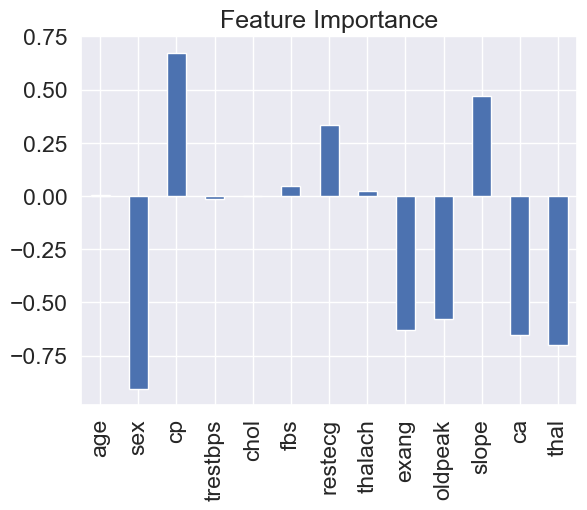

In [61]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

📉 **Interpreting Feature Coefficients:**

When examining the feature coefficients, we notice that some are negative and some are positive. 

- A larger value (bigger bar) indicates that the feature has a stronger influence on the model's decision-making process.
- Negative values indicate a negative correlation, while positive values indicate a positive correlation.

For instance, the coefficient for the 'sex' attribute is -0.904. This negative value suggests that as the value for 'sex' increases, the likelihood of the target value decreases.

We can further explore this relationship by comparing the 'sex' column to the target column.


In [62]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


📊 **Analyzing the Relationship between 'Sex' and Heart Disease:**

Upon closer inspection, we observe that when the 'sex' attribute is 0 (indicating female), there are approximately three times as many individuals with heart disease (target = 1) compared to those without (72 vs. 24).

Conversely, as the 'sex' attribute increases to 1 (indicating male), the ratio narrows down to nearly one-to-one (114 vs. 93) between individuals with and without heart disease.

What's the implication of this finding?

It indicates that the model has identified a discernible pattern reflecting the dataset. Based on these observations and the specific dataset, it suggests that females are more predisposed to heart disease.

Let's explore the presence of a positive correlation.


In [ ]:
# Contrast slope (positive coefficient) with target
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


: 

🔍 **Analyzing the Relationship between 'Slope' and Heart Disease:**

Referring back to the data dictionary, we understand that 'slope' represents the slope of the peak exercise ST segment, with three categories:
- 0: Upsloping (better heart rate with exercise) - uncommon
- 1: Flatsloping (minimal change) - typical of a healthy heart
- 2: Downsloping (signs of an unhealthy heart)

According to our model, there's a positive correlation of 0.470 between 'slope' and the target variable, although not as strong as the correlation between 'sex' and the target, it's still noteworthy.

This positive correlation suggests that as the 'slope' increases, so does the target value.

Is this assertion accurate?

Indeed, when examining the contrast (using pd.crosstab(df["slope"], df["target"])), we find that as the slope increases, so does the target.

What are the implications of this insight?

It's advisable to discuss this information with a subject matter expert. They may find it valuable to explore where the machine learning model identifies the most significant patterns (highest correlation), as well as areas with lower correlation.

This approach offers several advantages:
1. **Gaining insights:** Subject matter experts can provide valuable insights and help decipher confusing correlations and feature importances.
2. **Optimizing efforts:** Identification of features that offer the most value can influence data collection strategies for different problems.
3. **Streamlining processes:** Focusing on fewer, more impactful features can enhance model performance while reducing computation requirements, potentially leading to resource savings.


## 6. Experimentation

Well, we've completed all the metrics your boss requested. You should be able to put together a great report containing a confusion matrix, a handful of cross-validated metrics such as precision, recall, and F1, as well as which features contribute most to the model making a decision.

But after all this, you might be wondering where step 6 in the framework is, experimentation.

Well, the secret here is, as you might've guessed, the whole thing is experimentation.

From trying different models to tuning different models to figuring out which hyperparameters were best.

What we've worked through so far has been a series of experiments.

And the truth is, we could keep going. But of course, things can't go on forever.

So by this stage, after trying a few different things, we'd ask ourselves, did we meet the evaluation metric?

Remember we defined one in step 3.

If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue this project.

In this case, we didn't. The highest accuracy our model achieved was below 90%.

### What next?

You might be wondering, what happens when the evaluation metric doesn't get hit?

Is everything we've done wasted?

No.

It means we know what doesn't work. In this case, we know the current model we're using (a tuned version of LogisticRegression) along with our specific dataset doesn't hit the target we set ourselves.

This is where step 6 comes into its own.

A good next step would be to discuss with your team or research on your own different options of going forward.

- Could you collect more data?
- Could you try a better model? If you're working with structured data, you might want to look into CatBoost or XGBoost.
- Could you improve the current models (beyond what we've done so far)?
- If your model is good enough, how would you export it and share it with others? (Hint: check out Scikit-Learn's documentation on model persistence)

The key here is to remember, your biggest restriction will be time. Hence, why it's paramount to minimize your times between experiments.

The more you try, the more you figure out what doesn't work, the more you'll start to get a hang of what does.
